In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df_clean = df.dropna(subset=['Age', 'Fare'])[['Age', 'Pclass', 'Fare']]

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
X = df_clean[['Age', 'Pclass']]
y = df_clean['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))

MAE: 24.322781125639057
MSE: 3364.922912856981
R² Score: 0.1917633318253048
Intercept: 133.3072666812878
Coefficients: {'Age': -0.43695888508818964, 'Pclass': -38.29728934675796}


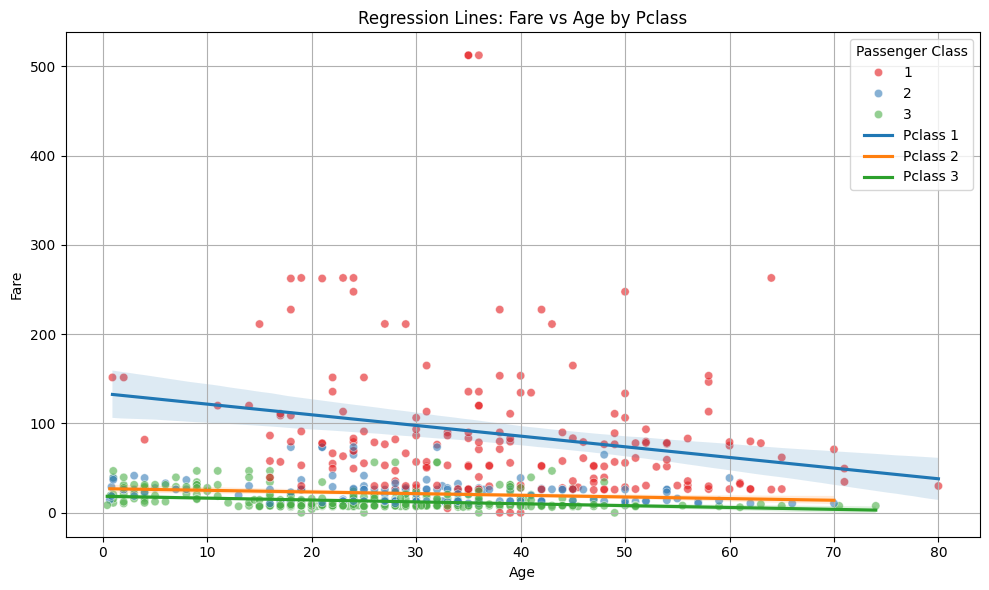

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df_clean, palette='Set1', alpha=0.6)

for pclass in sorted(df_clean['Pclass'].unique()):
    subset = df_clean[df_clean['Pclass'] == pclass]
    sns.regplot(x='Age', y='Fare', data=subset, scatter=False, label=f'Pclass {pclass}')

plt.title("Regression Lines: Fare vs Age by Pclass")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title='Passenger Class')
plt.grid(True)
plt.tight_layout()
plt.show()